In [31]:
# Add relevant Jupyter notebook extensions 

In [32]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/Users/孙泰伦/牛津/大三/B1/b1-coding-practical-mt24-main', '/Users/孙泰伦/牛津/大三/B1/b1-coding-practical-mt24-main/notebooks', '/Library/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/Users/孙泰伦/牛津/大三/B1/b1-coding-practical-mt24-main/.venv/lib/python3.11/site-packages']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

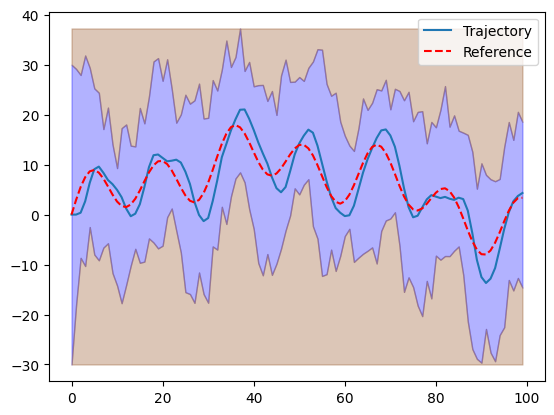

In [33]:
# Import relevant modules

import os
import sys

# Add the parent directory of 'uuv_mission' to the PYTHONPATH
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import the required modules
from uuv_mission.control import PDController  # Import Controller from the new module
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission


# Construct the absolute path to the 'mission.csv' file
data_dir = os.path.join(project_root, 'data')
csv_file = os.path.join(data_dir, 'mission.csv')

# Now load the mission using the absolute path
sub = Submarine()
control = PDController(Kp=0.15, Kd=0.6)
closed_loop = ClosedLoop(sub, control)

# Load mission from the absolute path
mission = Mission.from_csv(csv_file)

# Run the simulation
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)